# IMPORT THE LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import csv

# PREPROCESS THE DATASET AND CALCULATE

In [ ]:
class Data():
  def fetch_data(self):
    produksi_padi = "produksi_padi_indo.csv"
    penduduk = "penduduk_indo.csv"
    konsumsi_padi = "konsumsi_padi_indo.csv"
    GKG = "GKG_indo.csv"
    self.df_produksi_padi = pd.read_csv(produksi_padi)
    self.df_penduduk = pd.read_csv(penduduk)
    self.df_konsumsi_padi = pd.read_csv(konsumsi_padi)
    self.df_GKG = pd.read_csv(GKG)

  @staticmethod
  def preprocess_data(df):
    grouped_df = df.drop(['UID'], axis=1)
    grouped_df = grouped_df.groupby(['Province']).sum()
    grouped_df = grouped_df.T
    grouped_df.index = pd.to_datetime(grouped_df.index, infer_datetime_format=True)
    return grouped_df


  @staticmethod
  def preprocess_gkg(df):
    grouped_df = df.drop(['UID'], axis=1)
    grouped_df = grouped_df.groupby(['Province']).sum()
    grouped_df.loc['Total'] = grouped_df.sum()
    grouped_df = grouped_df.T
    return grouped_df

  @staticmethod
  def daily_data(df):
        new_df = df.diff()
        new_df = new_df.iloc[1:, :]
        return new_df

In [ ]:
if __name__ == "__main__":
    d = Data()
    d.fetch_data()

In [ ]:
    print(d.preprocess_data(d.df_produksi_padi))
    # print(d.df_produksi_padi)

Province            ACEH        BALI       BANTEN       BENGKULU  \
1964-01-01  1.861567e+06  667069.060  1687783.300  288810.520000   
1965-01-01  1.714438e+06  579320.530  1470503.350  296472.070000   
1966-01-01  1.757313e+06  532168.450  1655170.090  292834.040000   
1967-01-01  1.634640e+06  618910.810  1603247.000  271117.190000   
1968-01-01  1.509456e+06  680601.600  1788583.000  281610.100000   
1969-01-01  1.460277e+06  635610.698  1741360.263  270629.836667   
1970-01-01  1.381875e+06  642276.234  1774794.568  270266.496000   
1971-01-01  1.303473e+06  648941.770  1808228.873  276290.924000   
1972-01-01  1.225071e+06  655607.306  1841663.178  272315.352000   
1973-01-01  1.146669e+06  662272.842  1875097.483  278339.780000   
1974-01-01  1.168267e+06  668938.378  1908531.788  278809.100533   
1975-01-01  1.179864e+06  675603.914  1941966.093  280555.974800   
1976-01-01  1.171462e+06  682269.450  1975400.398  282302.849067   
1977-01-01  1.148418e+06  688934.986  2008834.70

In [ ]:
class ArrayConvert:
    def __init__(self):
        self.d = Data()

    def kb_calculate(self):
        penduduk = d.preprocess_data(d.df_penduduk)
        x = d.preprocess_data(d.df_konsumsi_padi)
        p = np.transpose(np.array(penduduk))
        n = np.transpose(np.array(x))

        result = []
        for i in range(0,34):
                row_result = []
                for j in range(0,57):
                      row_result = p[i][j] * n[i][j]
                      result.append(row_result)

        result = [result[i:i+57] for i in range(0, len(result), 57)]

        # print(result.shape)
        with open('konsumsi_beras.csv', 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerows(result)
        return result

    def kp_calculate(self):
        kb_result = self.kb_calculate()
        y = d.preprocess_gkg(d.df_GKG)
        b = np.transpose(np.array(y))

        hasil = []
        for i in range(0,34):
                row_hasil = []
                for j in range(0,57):
                      row_hasil = kb_result[i][j] / b[i][0]
                      hasil.append(row_hasil)

        hasil = [hasil[i:i+57] for i in range(0, len(hasil), 57)]

        with open('kesediaan_padi.csv', 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerows(hasil)
        return hasil

    def sp_calculate(self):
        kb_result = self.kb_calculate()
        kp_result = self.kp_calculate()
        prod = d.preprocess_data(d.df_produksi_padi)
        produk = np.transpose(np.array(prod))


        end = []
        for i in range(0,34):
                row_end = []
                for j in range(0,57):
                      row_end = produk[i][j] - kp_result[i][j]
                      end.append(row_end)

        # Reshape the end as a 3x3 matrix
        end = [end[i:i+57] for i in range(0, len(end), 57)]


        with open('sediaan_beras.csv', 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerows(end)

In [ ]:
if __name__ == "__main__":
    convert = ArrayConvert()
    convert.sp_calculate()

[[440751.9969391304, 438924.82288695633, 434747.1668869563, 446461.3008, 444185.15540869586, 446927.0785947813, 449015.62219130463, 451094.40634434693, 453163.4310539137, 455222.6963199996, 457272.2021426093, 459311.9485217386, 461341.9354573896, 463362.1629495651, 465372.6309982596, 467373.3396034787, 469364.28876521654, 471345.4784834791, 473316.9087582605, 475278.5795895636, 477230.4909773914, 479172.642921738, 481105.0354226087, 483027.66847999877, 484940.5420939136, 486843.65626434714, 488737.0109913023, 490620.6062747824, 492494.4421147811, 494358.5185113047, 496212.83546434686, 498057.3929739139, 499892.1910399995, 501717.2296626069, 503532.50884173857, 505338.0285773893, 507133.7888695651, 508919.7897182595, 510696.0311234787, 512462.5130852165, 514219.235603476, 515966.1986782605, 517703.4023095635, 519430.84649739147, 521148.5312417379, 522856.45654260874, 524554.6223999986, 526243.0288139102, 527921.675784347, 529590.5633113021, 531249.6913947824, 532899.0600347809, 534538.6

In [ ]:
from datetime import datetime, timedelta

In [ ]:
import numpy as np
from datetime import datetime, timedelta

def year():
  # Create an array of datetime objects
  start_date = datetime(1964, 1, 1)
  end_date = datetime(2021, 1, 1)
  t = np.arange(start_date, end_date, timedelta(days=366.25)).astype(datetime)

  # Print the type of t
  print(type(t))

  # Print the shape of t
  print(t.shape)

  # Print the first element of t
  print(t[0])

  # Print the last element of t
  print(date.strftime('%d/%m/%Y') for date in t)
  with open('years.csv', 'w', newline='') as f:
            writer = csv.writer(f, delimiter = ',')
            writer.writerow([date.strftime('%d/%m/%Y') for date in t])

In [ ]:
if __name__ == "__main__":
  year()

<class 'numpy.ndarray'>
(57,)
1964-01-01 00:00:00
<generator object year.<locals>.<genexpr> at 0x7a2530b7fb50>


In [ ]:
mainfile = pd.read_csv('sediaan_beras.csv', header=None)
one_liner = pd.read_csv('years.csv', header=None)

one_liner.index = [0]

# Concatenate the dataframes
final_df = pd.concat([one_liner, mainfile])

# Display the final dataframe
print(final_df)
final_df.to_csv('mainfile.csv', index=False, header=False)

                0               1               2               3   \
0       01/01/1964      01/01/1965      02/01/1966      03/01/1967   
0   1359914.474301  1214864.616974  1262494.987952  1126488.790986   
1    149693.970123    68067.483642   -13130.441202    32701.909338   
2  -1928870.338006 -2109687.557514 -1996809.572572  -2286146.34104   
3   -582656.622155   -563209.54741  -557270.332341  -590395.739449   
4  -2010981.449285 -1896366.171164 -2086574.651706 -2204840.267144   
5   -812679.861427  -787520.002411  -796226.980128  -844820.225673   
6   -231563.800356  -276775.778546  -291286.197745  -291543.187478   
7    188900.824302   116852.532761   205188.572586   110910.875123   
8   5125054.647874  4682269.801101  4667430.121651   4560945.73325   
9   9538346.270927   8710290.58148  8603195.545659  8673929.705192   
10  9889168.427349  9268186.936479  9649667.858552  9479300.196658   
11   464984.356999   510499.116907   431294.325396   354403.696095   
12  1115361.650612  

In [ ]:
df_sediaan_beras = pd.read_csv('mainfile.csv')

# Create a new column in the DataFrame with the specified array
df_sediaan_beras['Province'] = ['Aceh', 'Bali', 'Banten', 'Bengkulu', 'Yogyakarta', 'Jakarta', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara']

# rearrange the dataframe so that 'new_column' is the first column
df_sediaan_beras = df_sediaan_beras[['Province'] + [col for col in df_sediaan_beras.columns if col != 'Province']]

# Insert UID as the second column
df_sediaan_beras.insert(1, 'UID', range(1, len(df_sediaan_beras) + 1))

df_sediaan_beras = df_sediaan_beras[['Province', 'UID'] + [col for col in df_sediaan_beras.columns if col not in ['Province', 'UID']]]


# Save the updated DataFrame to a new CSV file
df_sediaan_beras.to_csv('updated.csv', index=False)
print(df_sediaan_beras)

               Province  UID    01/01/1964    01/01/1965    02/01/1966  \
0                  Aceh    1  1.359914e+06  1.214865e+06  1.262495e+06   
1                  Bali    2  1.496940e+05  6.806748e+04 -1.313044e+04   
2                Banten    3 -1.928870e+06 -2.109688e+06 -1.996810e+06   
3              Bengkulu    4 -5.826566e+05 -5.632095e+05 -5.572703e+05   
4            Yogyakarta    5 -2.010981e+06 -1.896366e+06 -2.086575e+06   
5               Jakarta    6 -8.126799e+05 -7.875200e+05 -7.962270e+05   
6             Gorontalo    7 -2.315638e+05 -2.767758e+05 -2.912862e+05   
7                 Jambi    8  1.889008e+05  1.168525e+05  2.051886e+05   
8            Jawa Barat    9  5.125055e+06  4.682270e+06  4.667430e+06   
9           Jawa Tengah   10  9.538346e+06  8.710291e+06  8.603196e+06   
10           Jawa Timur   11  9.889168e+06  9.268187e+06  9.649668e+06   
11     Kalimantan Barat   12  4.649844e+05  5.104991e+05  4.312943e+05   
12   Kalimantan Selatan   13  1.115362

In [ ]:
class Result():
  def fetch_data_result(self):
    updated = "updated.csv"
    self.df_beras = pd.read_csv(updated)

  @staticmethod
  def preprocess_new_data(df):
    grouped_df = df.drop(['UID'], axis=1)
    grouped_df = grouped_df.groupby(['Province']).sum()
    grouped_df.loc['Total'] = grouped_df.sum()
    grouped_df = grouped_df.T
    grouped_df.index = pd.to_datetime(grouped_df.index, infer_datetime_format=True)
    return grouped_df

  @staticmethod
  def daily_data(df):
        new_df = df.diff()
        new_df = new_df.iloc[1:, :]
        return new_df


In [ ]:
if __name__ == "__main__":
    r = Result()
    r.fetch_data_result()

In [ ]:
  print(r.preprocess_new_data(r.df_beras))


Province            Aceh          Bali        Banten       Bengkulu  \
1964-01-01  1.359914e+06  1.496940e+05 -1.928870e+06 -582656.622155   
1965-01-01  1.214865e+06  6.806748e+04 -2.109688e+06 -563209.547410   
1966-02-01  1.262495e+06 -1.313044e+04 -1.996810e+06 -557270.332341   
1967-03-01  1.126489e+06  3.270191e+04 -2.286146e+06 -590395.739449   
1968-05-01  1.003896e+06  8.448606e+04 -2.082312e+06 -590592.525483   
1969-05-01  9.515957e+05  1.354742e+04 -2.228346e+06 -592962.989510   
1970-06-01  8.708165e+05 -4.334689e+03 -2.279606e+06 -593346.732029   
1971-07-01  7.900485e+05 -2.262918e+04 -2.331759e+06 -587265.276744   
1972-09-01  7.092916e+05 -4.133605e+04 -2.384806e+06 -591106.392320   
1973-09-01  6.285457e+05 -6.045530e+04 -2.438747e+06 -584870.078757   
1974-10-01  6.478110e+05 -7.998693e+04 -2.493582e+06 -584111.443523   
1975-11-01  6.570874e+05 -9.993095e+04 -2.549311e+06 -581997.825416   
1976-01-13  6.463749e+05 -1.202873e+05 -2.605934e+06 -579806.778171   
1977-0

<ipython-input-12-91cc424ea533>:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  grouped_df.index = pd.to_datetime(grouped_df.index, infer_datetime_format=True)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')


In [ ]:
Beras = r.preprocess_new_data(r.df_beras)
Beras = Beras.reset_index()
Beras

Province,index,Aceh,Bali,Banten,Bengkulu,Gorontalo,Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,Yogyakarta,Total
0,1964-01-01,1.359914e+06,1.496940e+05,-1.928870e+06,-582656.622155,-231563.800356,-8.126799e+05,188900.824302,5.125055e+06,9.538346e+06,...,-288511.717164,5.676827e+06,788912.804880,85362.552802,-5.527769e+05,1.008211e+06,2.663529e+06,5.291338e+05,-2.010981e+06,3.537892e+07
1,1965-01-01,1.214865e+06,6.806748e+04,-2.109688e+06,-563209.547410,-276775.778546,-7.875200e+05,116852.532761,4.682270e+06,8.710291e+06,...,-305032.772141,4.783856e+06,712475.440549,66649.110641,-5.874285e+05,1.014765e+06,2.274521e+06,5.272500e+05,-1.896366e+06,3.119538e+07
2,1966-02-01,1.262495e+06,-1.313044e+04,-1.996810e+06,-557270.332341,-291286.197745,-7.962270e+05,205188.572586,4.667430e+06,8.603196e+06,...,-236592.916497,4.439905e+06,649374.706777,88178.982793,-6.544041e+05,9.250587e+05,2.420126e+06,5.099516e+05,-2.086575e+06,3.098927e+07
3,1967-03-01,1.126489e+06,3.270191e+04,-2.286146e+06,-590395.739449,-291543.187478,-8.448202e+05,110910.875123,4.560946e+06,8.673930e+06,...,-306966.915089,4.811765e+06,718749.263728,71254.370519,-6.870648e+05,8.327449e+05,2.215836e+06,4.229584e+05,-2.204840e+06,2.970056e+07
4,1968-05-01,1.003896e+06,8.448606e+04,-2.082312e+06,-590592.525483,-288043.440890,-8.577501e+05,90312.234853,4.822167e+06,8.411443e+06,...,-247298.030317,5.080109e+06,593657.099114,17678.504964,-6.914939e+05,8.787216e+05,2.437080e+06,4.953739e+05,-2.200798e+06,3.014146e+07
5,1969-05-01,9.515957e+05,1.354742e+04,-2.228346e+06,-592962.989510,-295950.067042,-8.632142e+05,81401.107636,5.019286e+06,8.500802e+06,...,-252751.531035,5.108867e+06,577307.078091,56636.897033,-7.139159e+05,8.519888e+05,2.248783e+06,5.642522e+05,-2.288867e+06,2.955460e+07
6,1970-06-01,8.708165e+05,-4.334689e+03,-2.279606e+06,-593346.732029,-299419.990862,-8.772691e+05,61049.512822,4.881173e+06,8.353200e+06,...,-244690.053980,5.092323e+06,568768.851245,13574.899049,-7.333830e+05,8.395231e+05,2.297632e+06,6.324076e+05,-2.360994e+06,2.916405e+07
7,1971-07-01,7.900485e+05,-2.262918e+04,-2.331759e+06,-587265.276744,-302778.656778,-8.924325e+05,60688.145048,4.927215e+06,8.261161e+06,...,-236620.465471,5.075778e+06,700190.275080,40513.908622,-7.529567e+05,8.415591e+05,2.146480e+06,6.032488e+05,-2.434174e+06,2.876880e+07
8,1972-09-01,7.092916e+05,-4.133605e+04,-2.384806e+06,-591106.392320,-306026.064791,-9.068045e+05,70317.004315,4.927072e+06,8.415311e+06,...,-228542.765507,5.159232e+06,687619.181597,37057.876751,-7.726369e+05,8.435804e+05,2.395327e+06,6.262568e+05,-2.508409e+06,2.910090e+07
9,1973-09-01,6.285457e+05,-6.045530e+04,-2.438747e+06,-584870.078757,-309162.214899,-9.216849e+05,69936.090621,4.926812e+06,8.295782e+06,...,-220456.954088,5.142684e+06,718588.605996,38761.272037,-7.906708e+05,8.455869e+05,2.244172e+06,6.492712e+05,-2.583697e+06,2.870744e+07


In [ ]:
Beras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                57 non-null     datetime64[ns]
 1   Aceh                 57 non-null     float64       
 2   Bali                 57 non-null     float64       
 3   Banten               57 non-null     float64       
 4   Bengkulu             57 non-null     float64       
 5   Gorontalo            57 non-null     float64       
 6   Jakarta              57 non-null     float64       
 7   Jambi                57 non-null     float64       
 8   Jawa Barat           57 non-null     float64       
 9   Jawa Tengah          57 non-null     float64       
 10  Jawa Timur           57 non-null     float64       
 11  Kalimantan Barat     57 non-null     float64       
 12  Kalimantan Selatan   57 non-null     float64       
 13  Kalimantan Tengah    57 non-null     

In [ ]:
Beras.isnull().sum()

Province
index                  0
Aceh                   0
Bali                   0
Banten                 0
Bengkulu               0
Gorontalo              0
Jakarta                0
Jambi                  0
Jawa Barat             0
Jawa Tengah            0
Jawa Timur             0
Kalimantan Barat       0
Kalimantan Selatan     0
Kalimantan Tengah      0
Kalimantan Timur       0
Kalimantan Utara       0
Kepulauan Bangka       0
Kepulauan Riau         0
Lampung                0
Maluku                 0
Maluku Utara           0
Nusa Tenggara Barat    0
Nusa Tenggara Timur    0
Papua                  0
Papua Barat            0
Riau                   0
Sulawesi Barat         0
Sulawesi Selatan       0
Sulawesi Tengah        0
Sulawesi Tenggara      0
Sulawesi Utara         0
Sumatera Barat         0
Sumatera Selatan       0
Sumatera Utara         0
Yogyakarta             0
Total                  0
dtype: int64

In [ ]:
Beras = Beras.rename(columns={'index': 'Date'})

In [ ]:
print(Beras.columns[1:].tolist())

['Aceh', 'Bali', 'Banten', 'Bengkulu', 'Gorontalo', 'Jakarta', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara', 'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta', 'Total']


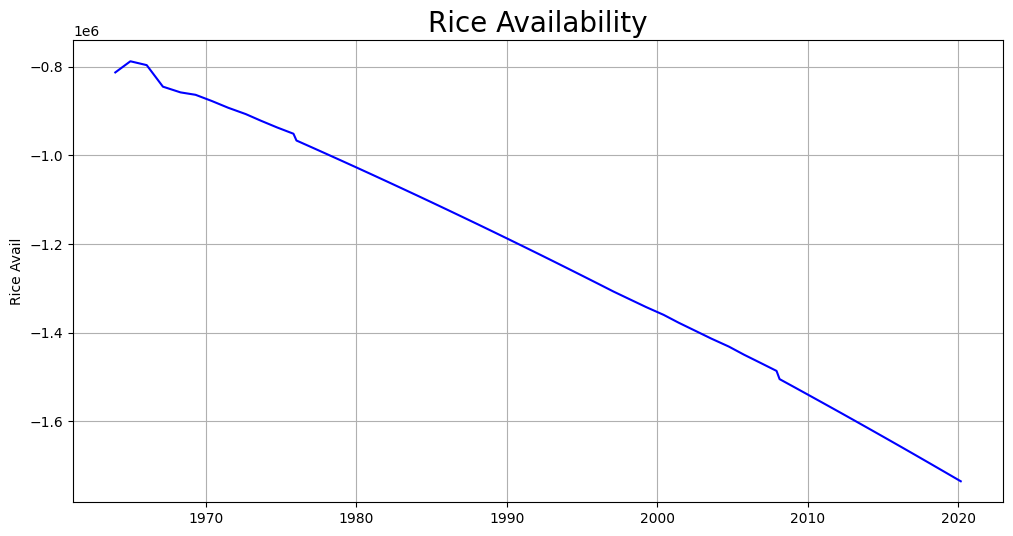

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Rice Availability", fontsize="20")
ax.plot(Beras["Date"], Beras["Jakarta"], color="Blue")
ax.set_ylabel("Rice Avail")
plt.grid()
plt.show()

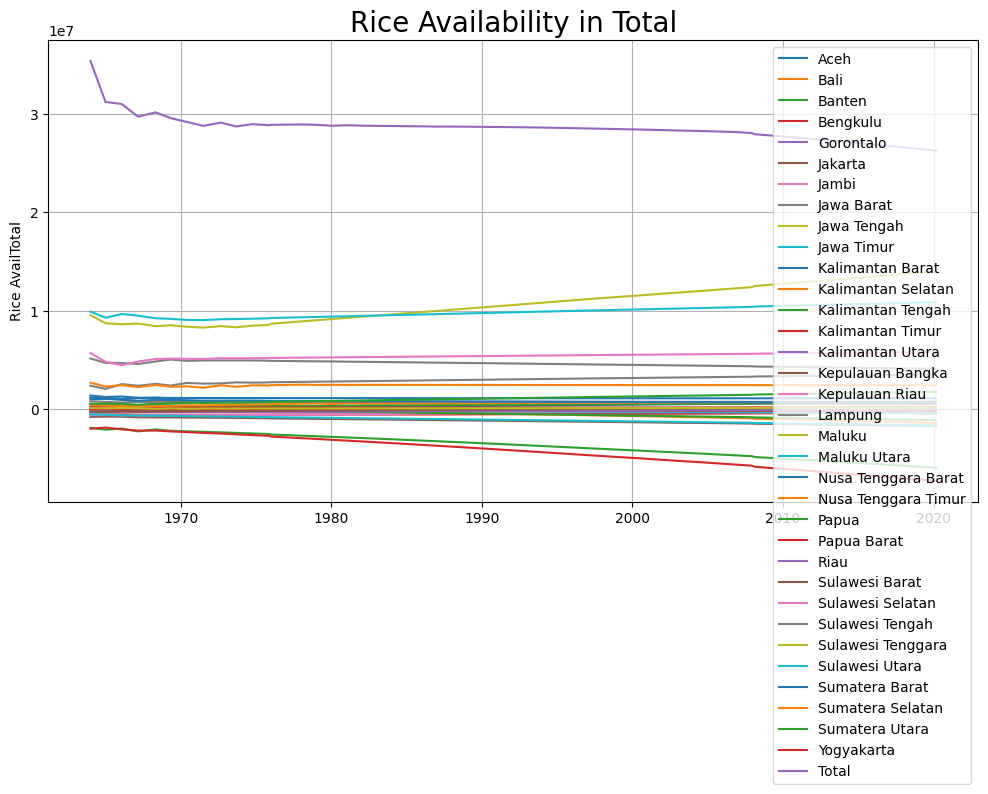

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
# print(Beras.columns[1:].tolist())
for state in Beras.columns[1:]:
    plt.title("Rice Availability in {}".format(state), fontsize=20)
    ax.plot(Beras["Date"], Beras[state], label=state)  # Menggunakan label untuk tiap plot
    ax.set_ylabel("Rice Avail{}".format(state))
    ax.legend()  # Menambahkan legenda untuk menunjukkan plot untuk setiap negara bagian
    plt.grid()

plt.show()

In [ ]:
 Beras.columns[1:]

Index(['Aceh', 'Bali', 'Banten', 'Bengkulu', 'Gorontalo', 'Jakarta', 'Jambi',
       'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat',
       'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur',
       'Kalimantan Utara', 'Kepulauan Bangka', 'Kepulauan Riau', 'Lampung',
       'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur',
       'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan',
       'Sulawesi Tengah', 'Sulawesi Tenggara', 'Sulawesi Utara',
       'Sumatera Barat', 'Sumatera Selatan', 'Sumatera Utara', 'Yogyakarta',
       'Total'],
      dtype='object', name='Province')